In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         679 non-null    int64 
 1   Title              679 non-null    object
 2   Address            679 non-null    object
 3   Area               679 non-null    object
 4   Deposit            679 non-null    int64 
 5   Rent               679 non-null    object
 6   MaintenanceCharge  679 non-null    object
 7   Furnished          679 non-null    object
 8   ApartmentType      679 non-null    object
 9   TenantType         673 non-null    object
 10  AvailableFrom      679 non-null    object
 11  Place              679 non-null    object
dtypes: int64(2), object(10)
memory usage: 63.8+ KB


In [3]:
def data_cleansing(df):
    """ 1. replaces null values with 0 and convert the column into numaric for Rent column.
        2. replaces MaintenanceCharge with zero if value is filled as 'NO' and convert into numaric type.
        3. splits the area column into two ['Area','Measure'] using space delimiter space.
        4. Converts Area into numaric column. 
    """
    
    df['Rent'] = df['Rent'].replace(['-'],'0')
    df['Rent']=pd.to_numeric(df['Rent'])
    df['MaintenanceCharge'] = df['MaintenanceCharge'].replace(['No'],'0')
    df['MaintenanceCharge']=pd.to_numeric(df['MaintenanceCharge'])
    df[["Area","Measure"]]= df["Area"].str.split(" ",expand = True)
    df['Area'] = df['Area'].str.replace(',','')
    df['Area']=pd.to_numeric(df['Area'])
data_cleansing(df)

In [4]:
df.head()

,Unnamed: 0,Title,Address,Area,Deposit,Rent,MaintenanceCharge,Furnished,ApartmentType,TenantType,AvailableFrom,Place,Measure
0,0,2 BHK Flat In Sri Lalitham for Rent In Velac...,"1st Main Rd,near AM ELITE TRADITIONAL STORES",880,65000,16500,1100,Semi furnished,2 BHK,Family,15-Nov-2022,Velachery,sqft
1,1,2 BHK Apartment In Agp Swahatham for Rent In...,"Agp Swahatham Park Avenue 2d street, near Per...",1000,60000,20000,1200,Fully furnished,2 BHK,Family,Ready to Move,Velachery,sqft
2,2,2 BHK Flat In Stand Alone Building for Rent ...,"St Antony's Higher Secondary School, 14th Stre...",800,80000,14300,0,Semi furnished,2 BHK,Family,Ready to Move,Velachery,sqft
3,3,2 BHK Flat In Sea Apartment for Rent In Thi...,"Near Thiruvanmiyur R.T.O., Valmiki Nagar, Jour...",1095,150000,27500,800,Semi furnished,2 BHK,Family,Ready to Move,Thiruvanmiyur,sqft
4,4,3 BHK Flat In Badeema Manzil for Rent In Vel...,velachery,1300,180000,30000,0,Semi furnished,3 BHK,Family,Ready to Move,Velachery,sqft


In [5]:
# remove unwanted columns
df = df.drop(["Unnamed: 0","Title", "Address", "AvailableFrom", "Measure"], axis=1)

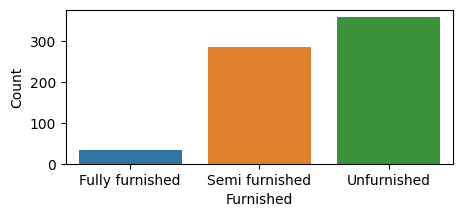

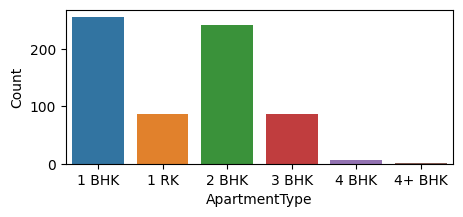

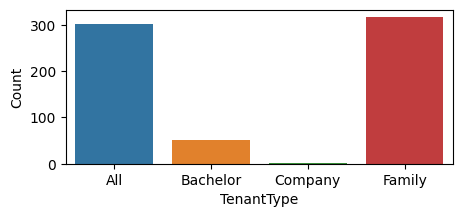

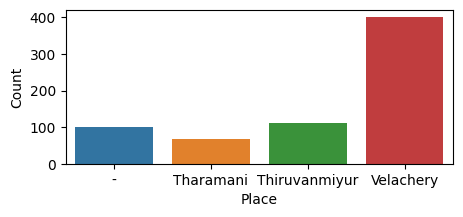

In [6]:
# Visulaise the Categorical column
for i in df.columns:
        if df[i].dtype == object:
            df_group = df.groupby(i).agg({'Area':'count'}).rename(columns = {'Area':'Count'}).reset_index()
            fig, ax = plt.subplots(figsize=(5, 2))
            sns.barplot(data=df_group, x=i,y ='Count', ax=ax)
            plt.show()

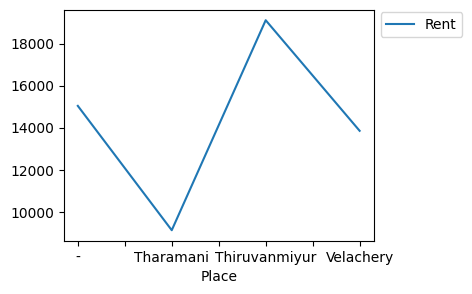

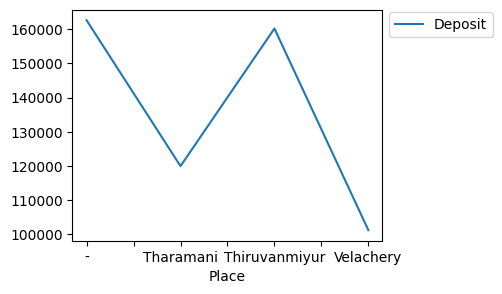

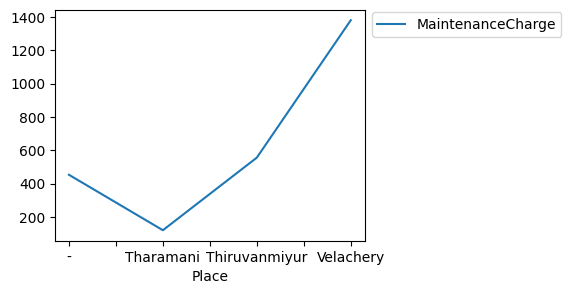

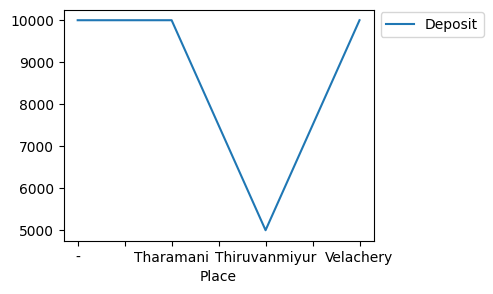

In [7]:

# Groupby multiple columnsdf
dfR=df[['Place','Rent']]
result = dfR.groupby(['Place']).mean()
ax = result.plot(figsize=(4,3))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

dfD=df[['Place','Deposit']]
result1 = dfD.groupby(['Place']).mean()
ax1 = result1.plot(figsize=(4,3))
ax1.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


dfM=df[['Place','MaintenanceCharge']]
result2 = dfM.groupby(['Place']).mean()
ax2 = result2.plot(figsize=(4,3))
ax2.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

dfp=df[['Place','Deposit']]
result3 = dfp.groupby(['Place']).min()
ax = result3.plot(figsize=(4,3))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

C:\Users\BhupathiSampath\AppData\Local\Temp\ipykernel_22624\4130574626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

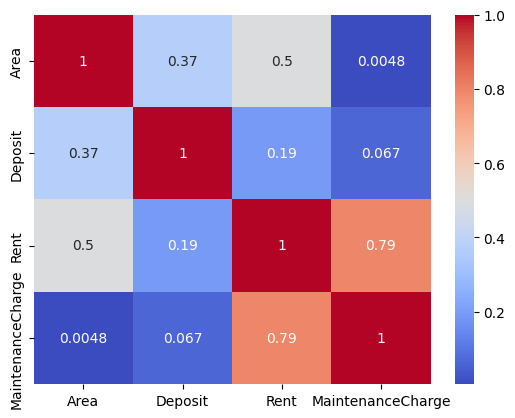

In [8]:
# check correlation between numaric features
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [9]:
# do log transformations to reduce the correlation betweem maintenanceCharge and Rent
df["Area"] = df["Area"].apply(lambda x: np.log(x) if not x==0 else x)
df["Rent"] = df["Rent"].apply(lambda x: np.log(x) if not x==0 else x)

C:\Users\BhupathiSampath\AppData\Local\Temp\ipykernel_22624\3815033846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

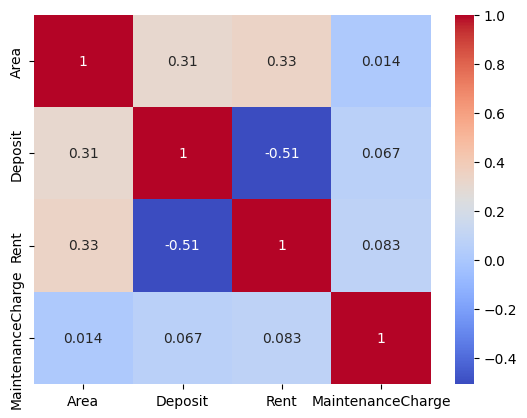

In [10]:
# Correlation after transformation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
# # 
# df["MaintenanceCharge"] = np.log(df["MaintenanceCharge"])

# df["Rent"] = np.log(df["Rent"])
# df["Area"] = np.cbrt(df["Area"])
# df["Deposit"] = np.log(df["Deposit"])

# df["Area"] = (df["Area"] -np.mean(df["Area"]))/np.sqrt(np.var(df["Area"]))
# df["MaintenanceCharge"] = (df["MaintenanceCharge"] -np.mean(df["MaintenanceCharge"]))/np.sqrt(np.var(df["MaintenanceCharge"]))
# df["Deposit"] = (df["Deposit"] -np.mean(df["Deposit"]))/np.sqrt(np.var(df["Deposit"]))
# df["MaintenanceCharge"] = (df["MaintenanceCharge"] -np.mean(df["MaintenanceCharge"]))/np.sqrt(np.var(df["MaintenanceCharge"]))

<h3>remove outliers</h3>

In [12]:
def remove_outliers(columns):
    for i in columns:
        Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')

        Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1

        print("Old Shape: ", df.shape)

        # Upper bound
        upper = np.where(df[i] >= (Q3+1.5*IQR))
        # Lower bound
        lower = np.where(df[i] <= (Q1-1.5*IQR))

        ''' Removing the Outliers '''
        df.drop(upper[0], inplace = True)
        df.drop(lower[0], inplace = True)

        print("New Shape: ", df.shape)
remove_outliers(["Rent","Area"])

Old Shape:  (679, 8)
New Shape:  (622, 8)
Old Shape:  (622, 8)
New Shape:  (614, 8)


C:\Users\BhupathiSampath\AppData\Local\Temp\ipykernel_22624\2623942684.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
C:\Users\BhupathiSampath\AppData\Local\Temp\ipykernel_22624\2623942684.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')
C:\Users\BhupathiSampath\AppData\Local\Temp\ipykernel_22624\2623942684.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'n

In [13]:
# Copy the dataframe
df1 = df.copy()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 678
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               614 non-null    float64
 1   Deposit            614 non-null    int64  
 2   Rent               614 non-null    float64
 3   MaintenanceCharge  614 non-null    int64  
 4   Furnished          614 non-null    object 
 5   ApartmentType      614 non-null    object 
 6   TenantType         608 non-null    object 
 7   Place              614 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 43.2+ KB


In [15]:
# for i in ["Area", "Rent", "MaintenanceCharge", "Deposit"]:
#     sns.boxplot(df1[i])
#     plt.show()

<h3>Create dummy numeric boolian values for all the features</h3>

In [16]:
# Create dummy numeric boolian values for all the features
df1 = pd.get_dummies(df1)
df1.head()

,Area,Deposit,Rent,MaintenanceCharge,Furnished_Fully furnished,Furnished_Semi furnished,Furnished_Unfurnished,ApartmentType_1 BHK,ApartmentType_1 RK,ApartmentType_2 BHK,...,ApartmentType_4 BHK,ApartmentType_4+ BHK,TenantType_All,TenantType_Bachelor,TenantType_Company,TenantType_Family,Place_-,Place_Tharamani,Place_Thiruvanmiyur,Place_Velachery
0,6.779922,65000,9.711116,1100,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,6.907755,60000,9.903488,1200,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,6.684612,80000,9.568015,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,6.998510,150000,10.221941,800,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,7.170120,180000,10.308953,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
# plt.figure(figsize=[15,5])
# sns.distplot(df1["Area"])
# plt.title('Distribution of Area')
# plt.xlabel('Area')
# plt.ylabel('Number of Occurences')

In [18]:
# plt.figure(figsize=[15,5])
# sns.distplot(df1["Rent"])
# plt.title('Distribution of Area')
# plt.xlabel('Area')
# plt.ylabel('Number of Occurences')

In [19]:
# print("Skewness: %f" % df1["Rent"].skew())
# print("Kurtosis: %f" % df1["Rent"].kurt())

<h3>create input and output featurs for the model</h3>

In [20]:
X = df1.drop(["Rent"], axis=1)
y = df1['Rent']

<h3>split the data into train and test datasets</h3>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(491, 20)
(123, 20)
(491,)
(123,)


<h3>fit the model by giving train data</h3>

In [22]:
def linear_regression(X_train, Y_train, X_test, Y_test):
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2_train = r2_score(Y_train, y_train_predict)
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)
    return {"The model performance for training set":"RMSE is {}".format(rmse),
            "r2 score for train data": 'r2_score is {}'.format(r2_train),
           "The model performance for testing set": 'RMSE is {}'.format(rmse),
           "r2 score for test data": 'r2_score is {}'.format(r2_test)}

<h2>get the predected values for train and test data by calling regression function</h2>